In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from methods import *
from numpy.linalg import norm
from sklearn.utils.extmath import randomized_svd  # truncated svd routine

### Load data

In [2]:
# Read data from csv (was created in Matlab)
M = pd.read_csv('../data/vectors_processed.csv').values
n, d = M.shape
ii = np.argwhere(M > 0)
print(f'fraction of nonzero entries = {len(ii)/(n*d)}')  # sanity check for import

fraction of nonzero entries = 0.02083677070713261


## Problem 3: CUR factorization

In [5]:
# Main driver loop
niters = 100
karr = np.arange(2, 11, 1)
aarr = np.arange(1, 9, 1)
meanratios = np.zeros((karr.shape[0], aarr.shape[0]))
itertimes = np.zeros((karr.shape[0], aarr.shape[0]))

for i in range(aarr.shape[0]):
    a = aarr[i]
    for j in range(karr.shape[0]):
        k = karr[j]

        for itr in range(niters):
            t0 = time.time()
            C, U, R = CUR(M, k, a*k)

            # Calculate truncated SVD and error
            Usvd, Ssvd, Vtsvd = randomized_svd(M, n_components=k)
            Mk = M - Usvd @ np.diag(Ssvd) @ Vtsvd
            meanratios[j, i] += norm(M - C @ U @ R, ord='fro') / \
                (niters*norm(M - Mk, ord='fro'))
        
            tf = time.time()
            itertimes[j, i] = (tf - t0)/niters  # add to average times
    
        print(f'combination {a}, {k} complete')

combination 1, 2 complete
combination 1, 3 complete
combination 1, 4 complete
combination 1, 5 complete
combination 1, 6 complete
combination 1, 7 complete
combination 1, 8 complete
combination 1, 9 complete
combination 1, 10 complete
combination 2, 2 complete
combination 2, 3 complete
combination 2, 4 complete
combination 2, 5 complete
combination 2, 6 complete
combination 2, 7 complete
combination 2, 8 complete
combination 2, 9 complete
combination 2, 10 complete
combination 3, 2 complete
combination 3, 3 complete
combination 3, 4 complete
combination 3, 5 complete
combination 3, 6 complete
combination 3, 7 complete
combination 3, 8 complete
combination 3, 9 complete
combination 3, 10 complete
combination 4, 2 complete
combination 4, 3 complete
combination 4, 4 complete
combination 4, 5 complete
combination 4, 6 complete
combination 4, 7 complete
combination 4, 8 complete
combination 4, 9 complete
combination 4, 10 complete
combination 5, 2 complete
combination 5, 3 complete
combinat

In [12]:
svdnorms = np.zeros(karr.shape)
for j in range(karr.shape[0]):
    Usvd, Ssvd, Vtsvd = randomized_svd(M, n_components=karr[j])
    Mk = Usvd @ np.diag(Ssvd) @ Vtsvd
    svdnorms[j] += norm(M - Mk, ord='fro')/niters

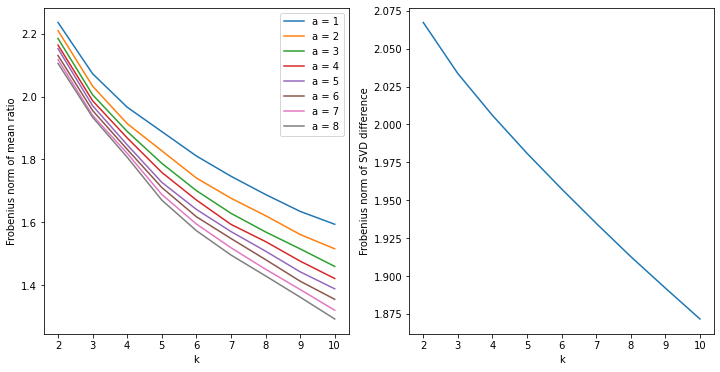

In [13]:
# Plot
legendtxt = [f'a = {str(i)}' for i in range(1, 9)]

_, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2)
ax1.plot(karr, meanratios)
ax1.set_xlabel('k'); ax1.set_ylabel('Frobenius norm of mean ratio')
ax1.legend(legendtxt)

ax2.plot(karr, svdnorms)  # should be the same for all a's
ax2.set_xlabel('k'); ax2.set_ylabel('Frobenius norm of SVD difference')
plt.savefig('cur_norms.png')
plt.show()

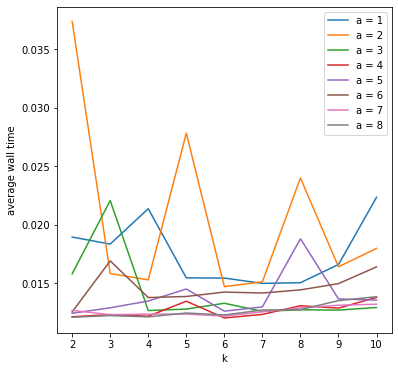

In [10]:
_ = plt.subplots(figsize=(6,6))
plt.plot(karr, itertimes)
plt.xlabel('k'); plt.ylabel('average wall time')
plt.legend(legendtxt)
plt.savefig('walltimes.png')
plt.show()

## Problem 4: Text categorization

In [11]:
# Optimal (a, k) = (8, 10)
a, k = 8, 10
C, U, R = CUR(M, k, a*k)
U, S, V = randomized_svd(M, k)